## PIMS Hackathon, Seattle 2025
### Project B - Preconditioners for Thermal Radiative Transfer
Packages: jupyter, numpy, matplotlib

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from solvers import *
from post_process import *

L2  : 8.762331740438677e-10
Linf: 4.312269652473333e-09


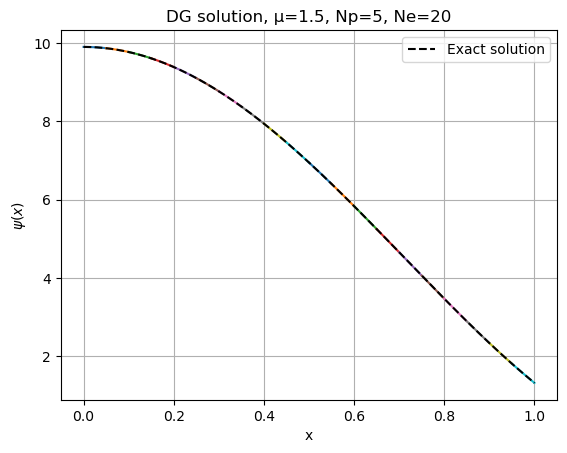

In [22]:
# ─── Example usage ───

# Parameters for the transport problem
μ       = 1.5
σ_t     = lambda x: x**2 + 1
source  = lambda x: (μ**3)*(2*x - 6.8*np.sin(2*x)) + (σ_t(x) * (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)))
inflow  = lambda x: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x))

# Mesh parameters
Ne = 20
xs      = np.linspace(0, 1, Ne + 1) # Mesh points / element boundaries
Np      = 5                     # Legendre polynomials per element (basis size)

# Plot numerical solution against the exact solution (MMS)
ψ_MMS     = lambda x: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x))
ψ_weights = transport_direct_solve(μ, σ_t, compute_source_term(source, Np, xs), inflow, Np, xs)
ψ_weights = ψ_weights.reshape(Ne, Np)

# Print the error in the solution
print("L2  :",error_Lp(ψ_weights, xs, Np, ψ_MMS, p=2))
print("Linf:",error_Lp(ψ_weights, xs, Np, ψ_MMS, p='inf'))
plot_solution(ψ_weights, xs, Np, μ=μ, exact_ψ_func=ψ_MMS)

  0%|          | 49/10000 [00:02<06:51, 24.17it/s]

Converged in 49 iterations
Chosen μ: -0.6546536707079773
L2  : 1.6434140143417124e-11
Linf: 2.0381918375278474e-11


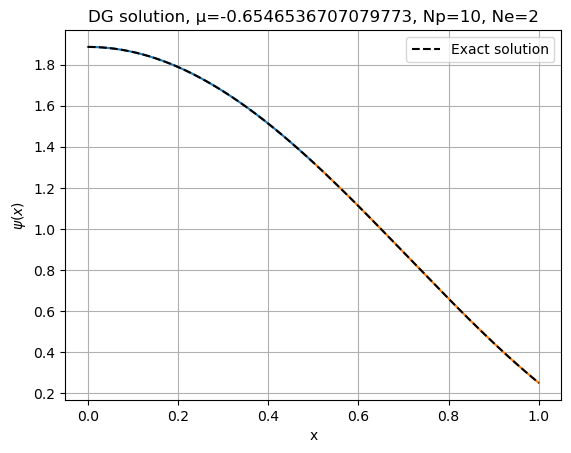

In [26]:
# ─── Example usage (Fixed point iteration) ───

# Parameters for the transport problem
ψ_MMS  = lambda x,μ: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
σ_t    = lambda x: x**3 + 1
σ_a    = lambda x: x**2 + 1
ε      = 0.5
source = lambda x,μ: (μ**3)/ε * (2*x - 6.8*np.sin(2*x)) + (σ_t(x)/ε**2 * ψ_MMS(x,μ)) \
                   - (σ_t(x)/ε - ε*σ_a(x)) / (3*ε) * ((x**2 +1) + 3.4*np.cos(2*x))
inflow = lambda x,μ: ψ_MMS(x,μ)
 
# Mesh parameters
Np = 10                      # Legendre polynomials per element (basis size)
Nμ = 5                      # Legendre polynomials per element (basis size)
xs = np.linspace(0, 1, 3) # Mesh points / element boundaries

# Solve
ψ_weights_all, μs, t = transport_direct_solve_diffusive(σ_t, σ_a, ε, source, inflow, Np, Nμ, xs, 
                                                     max_iter=int(1e4), tol=1e-10)
μi = 1 # Chosen μ for the error calculation
μc = μs[μi]
print("Chosen μ:", μc)

# Print the error in the solution
print("L2  :",error_Lp(ψ_weights_all[μi,:,:], xs, Np, lambda x: ψ_MMS(x,μc), p=2))
print("Linf:",error_Lp(ψ_weights_all[μi,:,:], xs, Np, lambda x: ψ_MMS(x,μc), p='inf'))

# Plot numerical solution against the exact solution (MMS)
plot_solution(ψ_weights_all[μi,:,:], xs, Np, μ=μc, exact_ψ_func=lambda x: ψ_MMS(x,μc))

  0%|          | 10/100000 [00:00<16:37, 100.27it/s]


Converged in 10 iterations


  0%|          | 49/100000 [00:00<14:50, 112.30it/s]


Converged in 49 iterations


  0%|          | 161/100000 [00:01<13:29, 123.29it/s]


Converged in 161 iterations


  1%|          | 526/100000 [00:04<13:30, 122.76it/s]


Converged in 526 iterations


  2%|▏         | 1808/100000 [00:14<12:55, 126.58it/s]


Converged in 1808 iterations


  6%|▋         | 6439/100000 [00:53<13:01, 119.70it/s]


Converged in 6439 iterations


 23%|██▎       | 23336/100000 [03:10<10:24, 122.80it/s]


Converged in 23336 iterations


 85%|████████▌ | 85057/100000 [11:25<02:00, 124.11it/s]


Converged in 85057 iterations


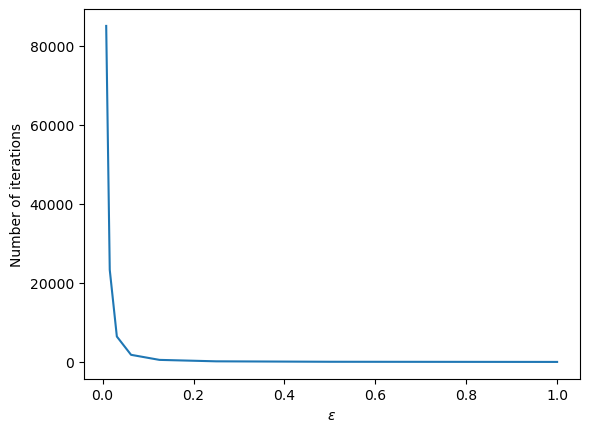

In [11]:
εs = [1*0.5**i for i in range(8)]
n_iter = []
for ε in εs:
    # Parameters for the transport problem
    ψ_MMS  = lambda x,μ: (μ**2)*((x**2 +1) + 3.4*np.cos(2*x)) # Manufactured solution
    σ_t    = lambda x: x**3 + 1
    σ_a    = lambda x: x**2 + 1
    source = lambda x,μ: (μ**3)/ε * (2*x - 6.8*np.sin(2*x)) + (σ_t(x)/ε**2 * ψ_MMS(x,μ)) \
                    - (σ_t(x)/ε - ε*σ_a(x)) / (3*ε) * ((x**2 +1) + 3.4*np.cos(2*x))
    inflow = lambda x,μ: ψ_MMS(x,μ)
    
    # Mesh parameters
    Np = 3                      # Legendre polynomials per element (basis size)
    Nμ = 5                      # Legendre polynomials per element (basis size)
    xs = np.linspace(0, 1, 6) # Mesh points / element boundaries

    # Solve
    ψ_weights_all, μs, t = transport_direct_solve_diffusive(σ_t, σ_a, ε, source, inflow, Np, Nμ, xs, 
                                                        max_iter=int(1e5), tol=1e-10)
    n_iter.append(t)

plt.plot(εs, n_iter)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Number of iterations")
plt.show()


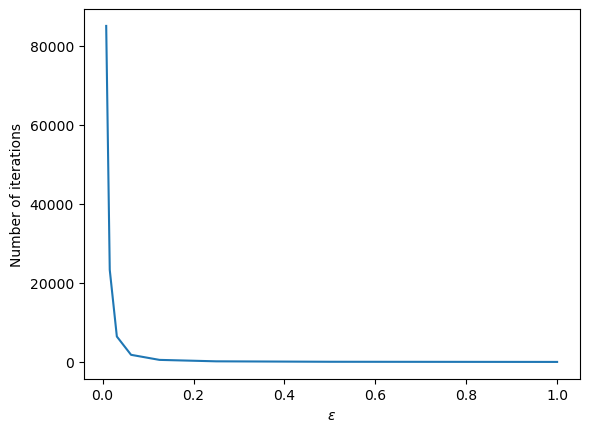

In [14]:
plt.plot(εs, n_iter)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Number of iterations")
plt.savefig("test_figures/n_iter_vs_epsilon.pdf")

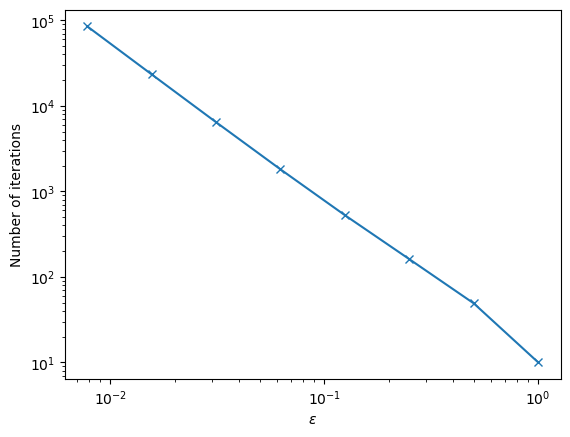

In [13]:
plt.plot(εs, n_iter, 'x-')
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"Number of iterations")
plt.xscale("log")
plt.yscale("log")
plt.savefig("test_figures/n_iter_vs_epsilon_log_log.pdf")